In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import re
import json

In [3]:
def load_model_results(path:str,model_name:str):
    U=pd.read_csv(path,names=["training_loss","training_accuracy","test_loss","test_accuracy"])
    U["model"]=model_name
    U.dropna(inplace=True)
    U["epoch"]=[i+1 for i in range(U.shape[0])]
    return U



In [32]:
U=[]
for fileName in os.listdir("results/MNIST"):
    match=re.match("([A-Za-z0-9-+]+)-Results-MNIST.csv",fileName)
    if match:
        R=load_model_results(f"results/MNIST/{fileName}",match.group(1))
        R["test_avg_accuracy"]=R["test_accuracy"].mean()
        R["test_max_accuracy"]=R["test_accuracy"].max()
        U.append(R)
V=pd.read_json("results/MNIST/ABCNet-Results-MNIST.json")
V.rename({"loss":"training_loss","accuracy":"training_accuracy","val_loss":"test_loss","val_accuracy":"test_accuracy"},inplace=True,axis=1)
V["test_avg_accuracy"]=V["test_accuracy"].mean()
V["test_max_accuracy"]=V["test_accuracy"].max()
V["model"]="ABCNet"
V["epoch"]=[i+1 for i in range(V.shape[0])]
U.append(V)
results=pd.concat(U,axis=0,ignore_index=True)
results.dropna(inplace=True)
results["data"]="Standard"

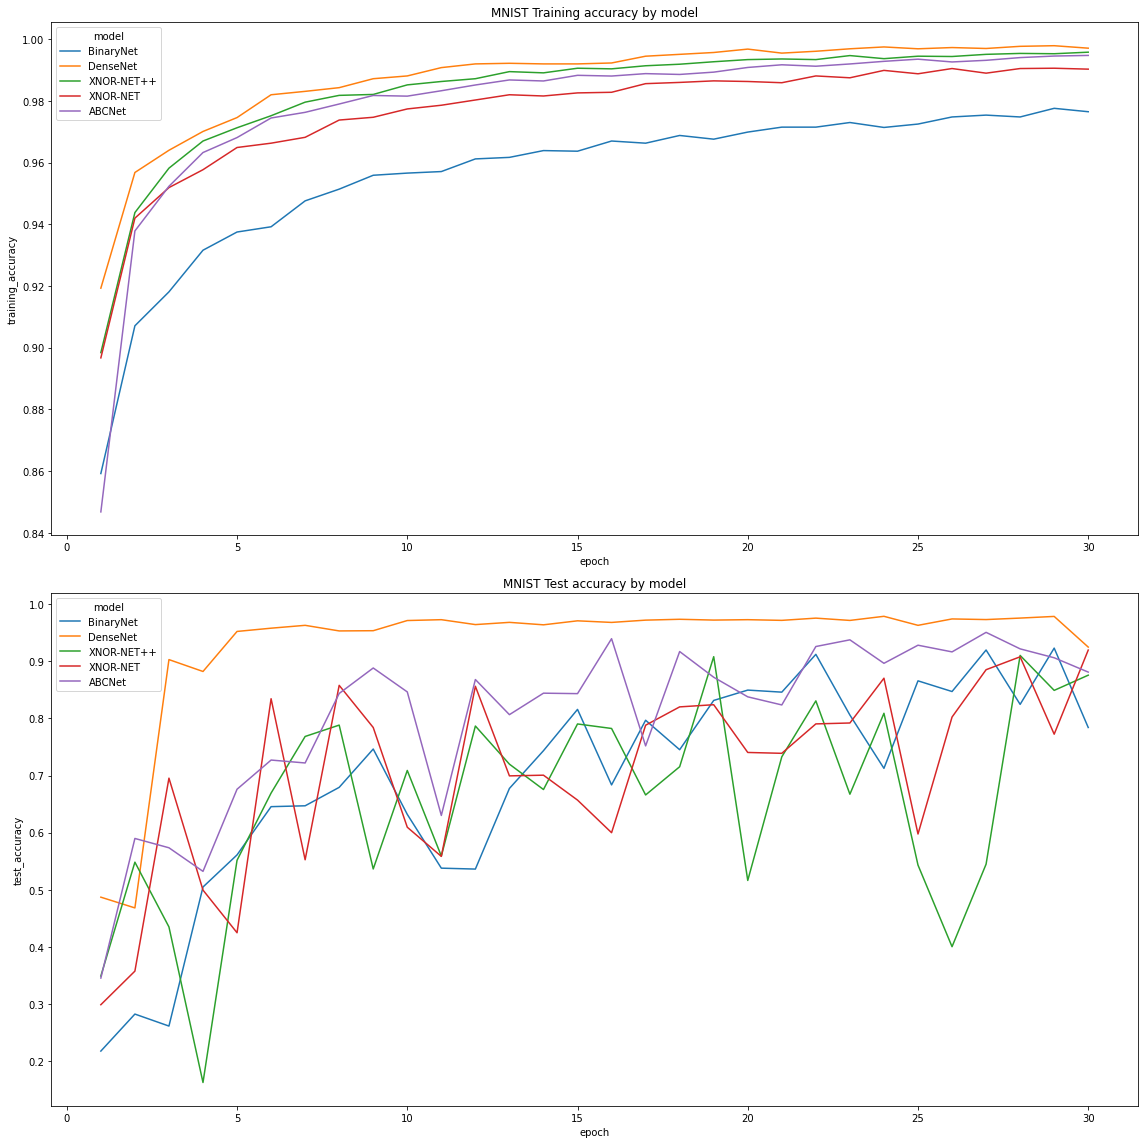

In [37]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(16,16))
sns.lineplot(data=results,x="epoch",y="training_accuracy",hue="model",ax=ax1)
ax1.set_title("MNIST Training accuracy by model")
sns.lineplot(data=results,x="epoch",y="test_accuracy",hue="model",ax=ax2)
ax2.set_title("MNIST Test accuracy by model")
fig.tight_layout()
fig.savefig("local/MNIST.svg")

In [70]:
def load_noisy_model(path:str,model_name:str):
    U=pd.read_json(path)
    U["model"]=model_name
    U["epoch"]=[i+1 for i in range(U.shape[0])]
    U.rename({"loss":"training_loss","accuracy":"training_accuracy","val_loss":"test_loss","val_accuracy":"test_accuracy"},inplace=True,axis=1)
    return U
U=[]
for fileName in os.listdir("local"):
    match=re.match("([A-Za-z0-9-+]+)-MNIST-Noise.json",fileName)
    if match:
        R=load_noisy_model(f"local/{fileName}",match.group(1))
        R["test_avg_accuracy"]=R["test_accuracy"].mean()
        R["test_max_accuracy"]=R["test_accuracy"].max()
        U.append(R)
results_with_noise=pd.concat([results[results["model"]=="DenseNet"],*U],ignore_index=True)
results_with_noise.sort_values(by=["test_max_accuracy","model","epoch"],inplace=True,ascending=False)
results_with_noise["data"]="Noisy"

In [84]:
def plot_results(data,save_path:str,style=None,ylim=(.70,1),palette="tab10"):
    fig,(ax1,ax2)=plt.subplots(2,1,figsize=(16,16))
    sns.lineplot(data=data,x="epoch",y="training_accuracy",hue="model",style=style,ax=ax1,palette="tab10")
    ax1.set_title("MNIST Training accuracy by model")
    sns.lineplot(data=data,x="epoch",y="test_accuracy",hue="model",style=style,ax=ax2,palette="tab10")
    ax2.set_title("MNIST Test accuracy by model")
    ax2.set(ylim=ylim)
    fig.tight_layout()
    fig.savefig(save_path)

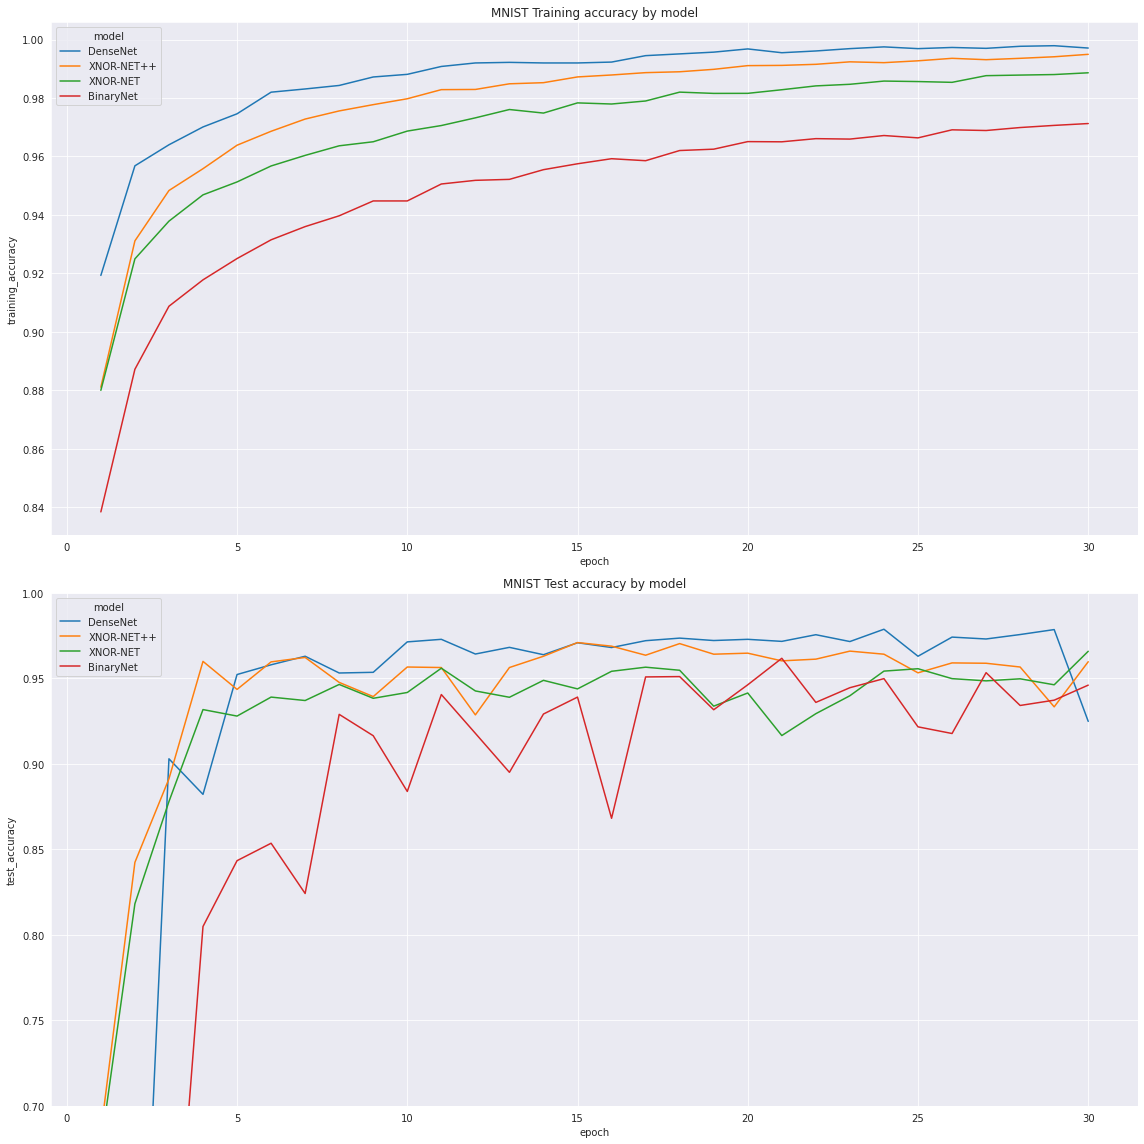

In [79]:
S1=["DenseNet","XNOR-NET++","XNOR-NET","BinaryNet"]
plot_results(results_with_noise[results_with_noise["model"].isin(S1)],"local/MNIST-noise-1.svg")

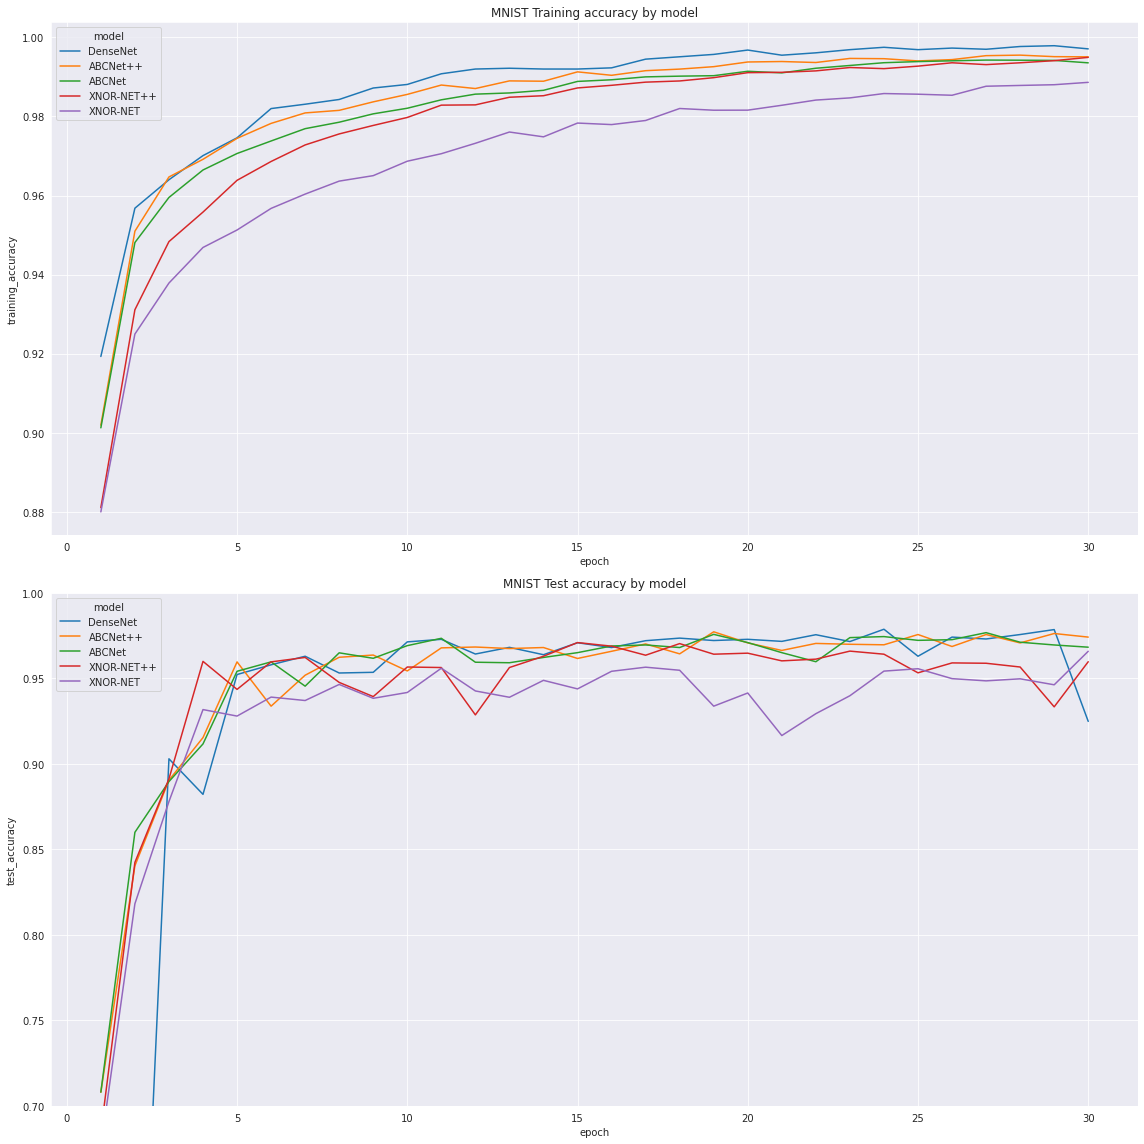

In [86]:
S2=["DenseNet","ABCNet++","ABCNet","XNOR-NET","XNOR-NET++"]
plot_results(results_with_noise[results_with_noise["model"].isin(S2)],"local/MNIST-noise-2.svg")

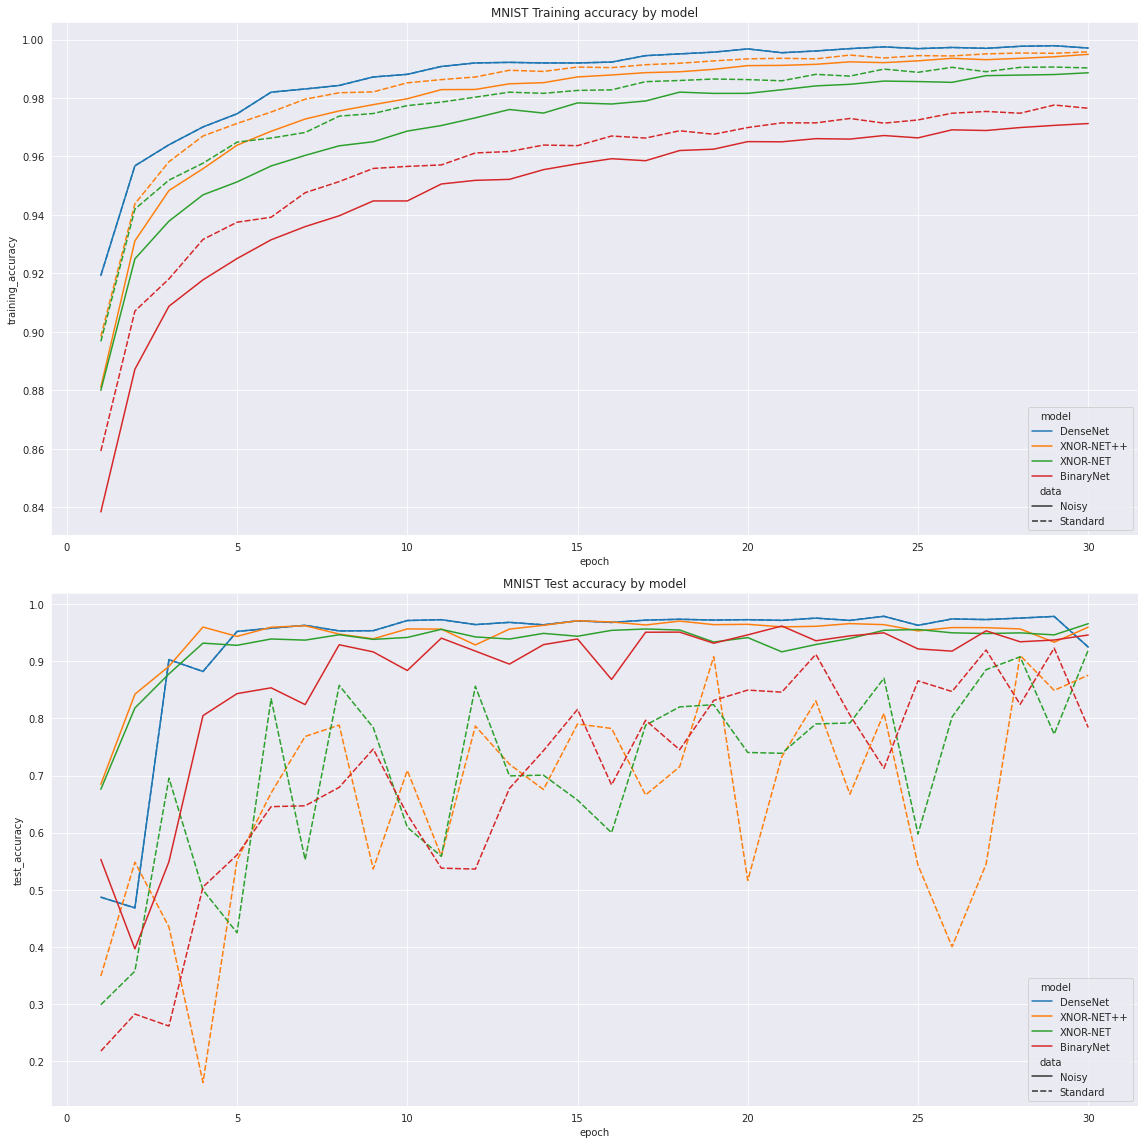

In [85]:
comparison_data=pd.concat([results_with_noise,results],ignore_index=True)
plot_results(comparison_data[comparison_data["model"].isin(S1)],save_path="local/MNIST-comparison.svg",style="data",ylim=None,palette=None)